# Project 2 - Car Insurance Claim Prediction

## 5.1 Software/Library Installation 

•	Python Website, https://www.python.org/   
•	Project Jupyter Website, https://jupyter.org/   
•	NumPy Website, https://numpy.org/   
•	SciPy Website, https://www.scipy.org/  
•	Pandas Website, https://pandas.pydata.org/  
•	Scikit-Learn Website, https://scikit-learn.org/  
•	MatPlotLib Website, https://matplotlib.org/  
•	Seaborn Website, https://seaborn.pydata.org/  


Let's start by reading the data into a pandas DataFrame.


In [17]:
import pandas as pd
data = pd.read_csv('data/train.csv')

print(data.head())
data.info(verbose = True)

  policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No  

We can already see that there are no null columns, so we don't need to worry about that.
Also, memory usage is acceptable so we can use all the data in the training set.
The policy_id column is unique for each object, so it won't be of much help for finding patterns in the data. Furthermore, the policy_ids for the data to which the model will be applied to will be difference, so we decided to drop it.

In [14]:
data.drop("policy_id",axis=1,inplace=True)
print(data.head())

   policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       0.515874        0.05             0.644231           C1   
1       0.672619        0.02             0.375000           C2   
2       0.841110        0.02             0.384615           C3   
3       0.900277        0.11             0.432692           C4   
4       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  ...  \
0                4990     1       A    M1       CNG   60Nm@3500rpm  ...   
1               27003     1       A    M1       CNG   60Nm@3500rpm  ...   
2                4076     1       A    M1       CNG   60Nm@3500rpm  ...   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm  ...   
4               34738     2       A    M3    Petrol   91Nm@4250rpm  ...   

  is_brake_assist is_power_door_locks  is_central_locking is_power_steering  \
0              No                  No                  No               Y

The dataset includes max_torque and max_power in the format 60Nm@3500rpm and 40.36bhp@6000rpm, respectively. Instead of just using one-hot encoding and increasing the dimensionality tremendously, we decided to split each of these two labels into two labels of their own (i.e. 4 labels in total).

In [15]:
data["max_torque_Nm"] = data["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
data["max_torque_rpm"] = data["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

data["max_power_bhp"] = data["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
data["max_power_rpm"] = data["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

#Drop original cols
data.drop(["max_torque","max_power"],axis=1,inplace=True)

print(data.head())

   policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       0.515874        0.05             0.644231           C1   
1       0.672619        0.02             0.375000           C2   
2       0.841110        0.02             0.384615           C3   
3       0.900277        0.11             0.432692           C4   
4       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type         engine_type  ...  \
0                4990     1       A    M1       CNG   F8D Petrol Engine  ...   
1               27003     1       A    M1       CNG   F8D Petrol Engine  ...   
2                4076     1       A    M1       CNG   F8D Petrol Engine  ...   
3               21622     1      C1    M2    Petrol  1.2 L K12N Dualjet  ...   
4               34738     2       A    M3    Petrol             1.0 SCe  ...   

   is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                                No           

A scatterplot plots the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. It makes an efficient tool to look for errors in our data. We can even have the plotting package color each entry by its class to look for trends within the classes.

A lot of labels were binary but represented as Yes/No rather than 1/0, so we decided to replace Yes with 1 and No with 0.

In [16]:
data = data.replace({ "No" : False , "Yes" : True })
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   engine_type                       58592 non-null  object 
 10  airbags                           58592 non-null  int64  
 11  is_esc                            58592 non-null  bool   
 12  is_a

In [7]:
# This line tells the notebook to show plots inside of the notebook
import seaborn as sb

# We have to temporarily drop the rows with 'NA' values # because the Seaborn plotting 
# function does not know what to do with them
#sb.pairplot(data.dropna(), hue='is_claim')

In [8]:
import math
import seaborn as sb
%matplotlib inline

import matplotlib.pyplot as plt

num_cols = data.shape[1] - 1 # -1 for the 'is_claim' column
num_rows = math.ceil(num_cols / 3) # 3 columns per row
"""
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

for col_idx, col in enumerate(data.columns):
    if col == 'is_claim':
        continue
    row_idx = col_idx // 3
    col_idx = col_idx % 3
    sb.violinplot(x='is_claim', y=col, data=data, ax=axs[row_idx, col_idx])

plt.tight_layout()
"""

"\nfig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))\n\nfor col_idx, col in enumerate(data.columns):\n    if col == 'is_claim':\n        continue\n    row_idx = col_idx // 3\n    col_idx = col_idx % 3\n    sb.violinplot(x='is_claim', y=col, data=data, ax=axs[row_idx, col_idx])\n\nplt.tight_layout()\n"

Some of the labels are categorical, which aren't supported by a large part of ML algorithms. We used pd.get_dummies in order to one-hot encode these labels.

In [12]:
for column in data.columns:
    if dict(data.dtypes)[column] == 'object':    
        y = pd.get_dummies(data[column], prefix=column)   
        data.drop(column, axis=1, inplace=True) 
        data = data.join(y)
        
print(data["is_claim"])        

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists
from sklearn.model_selection import train_test_split


# We can extract the data in this format from pandas like this:
training_inputs = data.drop(['is_claim'], axis=1)

# Similarly, we can extract the class labels
training_labels = data['is_claim']

test_inputs = data.drop(['is_claim'], axis=1)
test_labels = data['is_claim']

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:

data.dtypes


policy_tenure                        float64
age_of_car                           float64
age_of_policyholder                  float64
population_density                     int64
make                                   int64
                                      ...   
is_day_night_rear_view_mirror_Yes      uint8
is_ecw_No                              uint8
is_ecw_Yes                             uint8
is_speed_alert_No                      uint8
is_speed_alert_Yes                     uint8
Length: 128, dtype: object

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = DecisionTreeClassifier()

def apply_model_and_get_stats(model,x_train,y_train,x_test,y_test):
    # Train the classifier on the training data
    model.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision
    precision = precision_score(y_test, y_pred, average='macro')

    # Calculate recall
    recall = recall_score(y_test, y_pred, average='macro')

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print the results
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    return y_pred
y_pred_decision_tree = apply_model_and_get_stats(clf,training_inputs,training_labels,test_inputs,test_labels)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


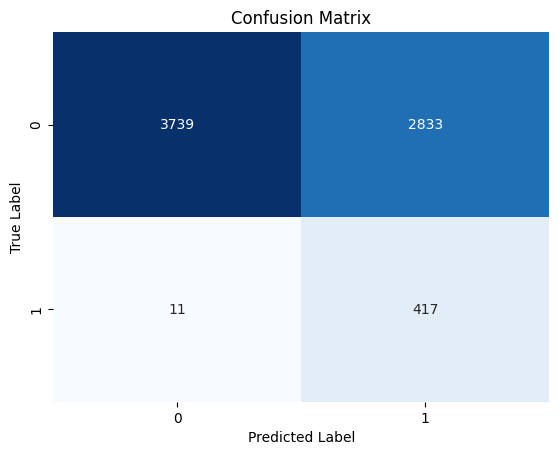

In [60]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

def display_confusion_matrix(y_pred,y_test):
    cm = confusion_matrix(y_test,y_pred)

    # Define the class labels
    classes = np.unique(y_test)

    # Create a confusion matrix plot using seaborn
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)

    # Set the axis labels and title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    # Show the plot
    plt.show()
    
display_confusion_matrix(y_pred_decision_tree,test_labels)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=40)

y_pred_knn = apply_model_and_get_stats(knn,training_inputs,training_labels,test_inputs,test_labels)

Accuracy: 0.5615714285714286
Precision: 0.517738728909418
Recall: 0.5764763852310283
F1-score: 0.4237867368811974


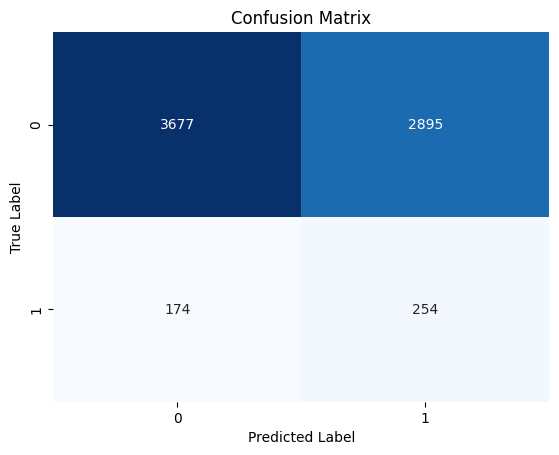

In [65]:
display_confusion_matrix(y_pred_knn,test_labels)

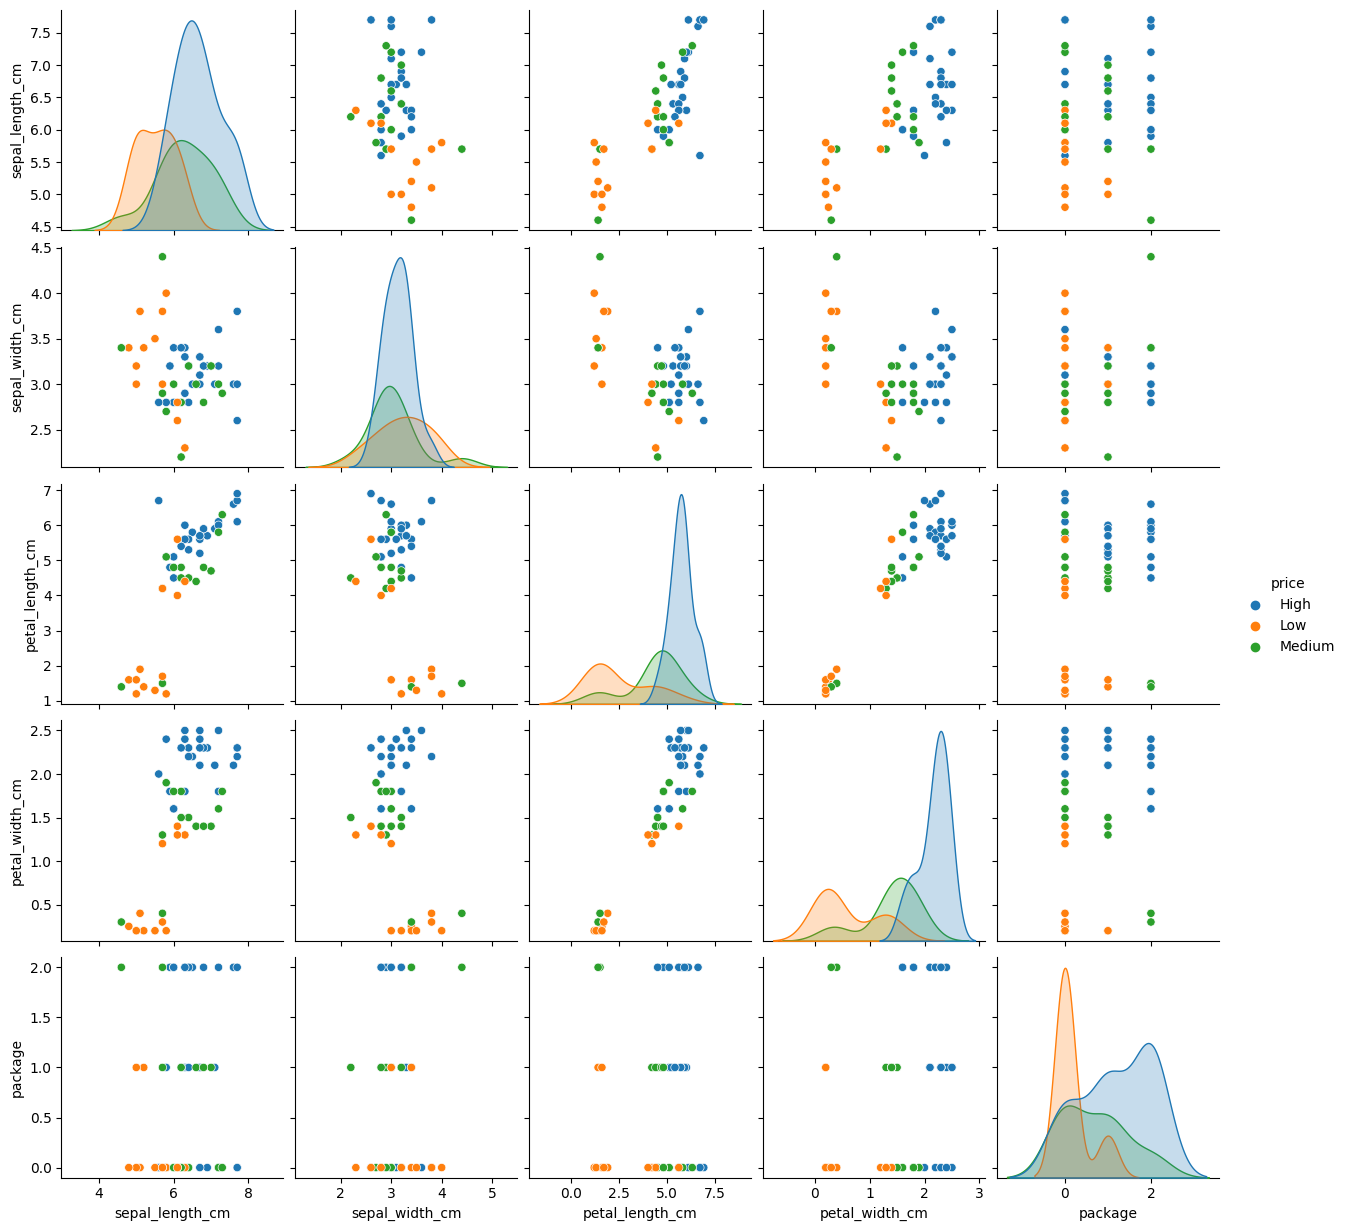

In [70]:
from sklearn.utils import resample

# count the number of entries for each category
value_counts = iris_data['price'].value_counts()

# determine the number of entries in the minority class (i.e., "high")
minority_count = value_counts[-1]

# randomly undersample the majority classes ("medium" and "low")
majority_samples = iris_data[iris_data['price'].isin(['Medium', 'Low'])]
undersampled_majority = resample(majority_samples, replace=False, n_samples=minority_count)

# combine the minority class with the undersampled majority classes
iris_data_undersampled = pd.concat([iris_data[iris_data['price'] == 'High'], undersampled_majority])


sb.pairplot(iris_data_undersampled.dropna(), hue='price')

The classification accuracy falls tremendously! Therefore, we need to find a systematic method to discover the best parameters for our model and data set. 

The most common method for model parameter tuning is Grid Search. The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.

Let's tune our decision tree classifier. We'll stick to only two parameters for now, but it's possible to simultaneously explore dozens of parameters if we want.

p)	Import GridSearchCV and perform a Grid Search over the Decision Tree parameters to find the best parameters, visualizing the grid with the accuracies for each parameter’s pairs (max_features 1-4 and max_depth 1-5). 

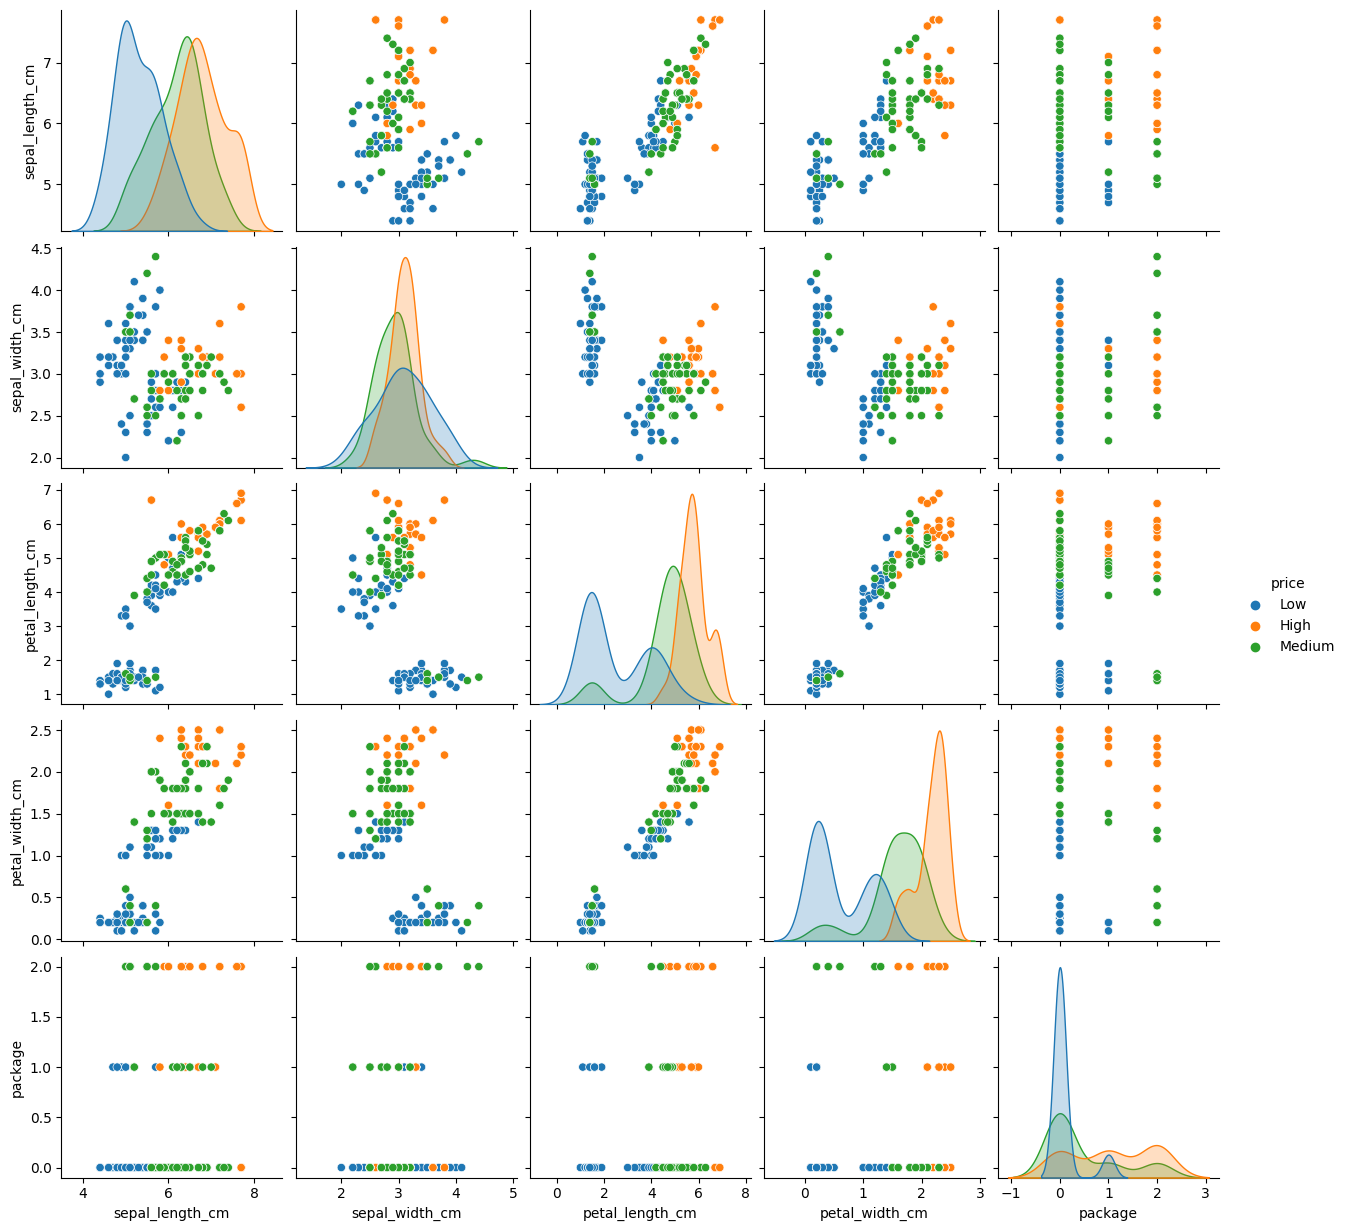

In [71]:
import pandas as pd
from sklearn.utils import resample

# count the number of entries for each category
value_counts = iris_data['price'].value_counts()

# determine the number of entries in the minority classes (i.e., "high" and "medium")
minority_counts = value_counts[-2:]

# oversample the minority classes ("high" and "medium")
oversampled_classes = []
for cls in ['High', 'Medium']:
    minority_samples = iris_data[iris_data['price'] == cls]
    oversampled_minority = resample(minority_samples, replace=True, n_samples=value_counts.max())
    oversampled_classes.append(oversampled_minority)

# combine the oversampled minority classes with the majority class ("low")
iris_data_oversampled = pd.concat([iris_data[iris_data['price'] == 'Low']] + oversampled_classes)


sb.pairplot(iris_data_oversampled.dropna(), hue='price')

In [113]:
undersampled_all_inputs = iris_data_undersampled[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values

# Similarly, we can extract the class labels
undersampled_all_labels = iris_data_undersampled['price'].values

(undersampled_training_inputs,
 undersampled_testing_inputs,
 undersampled_training_classes,
 undersampled_testing_classes) = train_test_split(undersampled_all_inputs, undersampled_all_labels, test_size=0.25, random_state=1)


In [114]:
oversampled_all_inputs = iris_data_oversampled[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm']].values

# Similarly, we can extract the class labels
oversampled_all_labels = iris_data_oversampled['price'].values

(oversampled_training_inputs,
 oversampled_testing_inputs,
 oversampled_training_classes,
 oversampled_testing_classes) = train_test_split(oversampled_all_inputs, oversampled_all_labels, test_size=0.25, random_state=1)

Now let's visualize the grid search to see how the parameters interact.

q)	Visualize in a graphical manner the final decision tree achieved. 

Accuracy: 0.6923076923076923
Precision: 0.6833333333333332
Recall: 0.688888888888889
F1-score: 0.6793650793650793


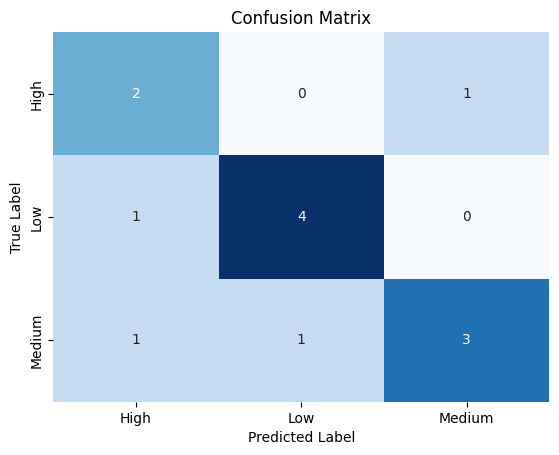

In [134]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=3)
y_pred_dt_undersampled = apply_model_and_get_stats(decision_tree_classifier,undersampled_training_inputs,
                        undersampled_training_classes,undersampled_testing_inputs,undersampled_testing_classes)


display_confusion_matrix(y_pred_dt_undersampled, undersampled_testing_classes)


Accuracy: 0.7777777777777778
Precision: 0.7928853754940711
Recall: 0.7620772946859903
F1-score: 0.7684875510962467


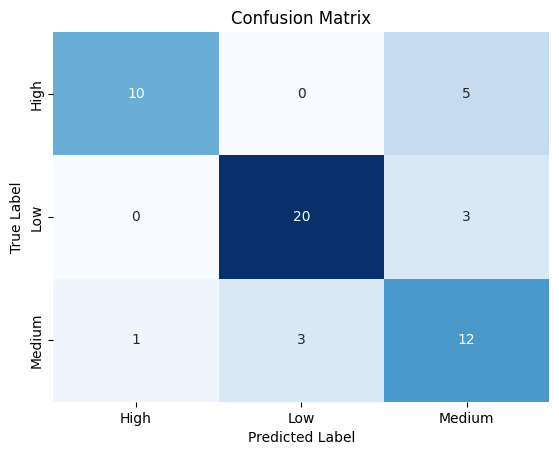

In [137]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=3)
y_pred_dt_oversampled = apply_model_and_get_stats(decision_tree_classifier,oversampled_training_inputs,
                        oversampled_training_classes,oversampled_testing_inputs,oversampled_testing_classes)


display_confusion_matrix(y_pred_dt_oversampled,oversampled_testing_classes)


Accuracy: 0.6153846153846154
Precision: 0.6166666666666667
Recall: 0.6222222222222222
F1-score: 0.6126984126984127


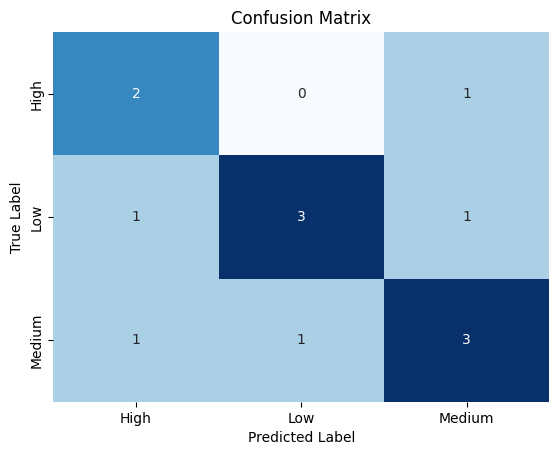

In [140]:
knn = KNeighborsClassifier()
y_pred_knn_undersampled = apply_model_and_get_stats(knn,undersampled_training_inputs,
                        undersampled_training_classes,undersampled_testing_inputs,undersampled_testing_classes)


display_confusion_matrix(y_pred_knn_undersampled,undersampled_testing_classes)


Now we can take the best classifier from the Grid Search and use that:

Accuracy: 0.7407407407407407
Precision: 0.7405228758169935
Recall: 0.7204106280193235
F1-score: 0.7267115600448933


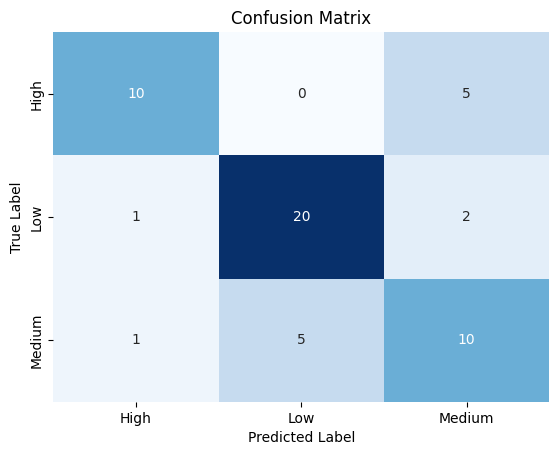

In [141]:
knn = KNeighborsClassifier()
y_pred_knn_oversampled = apply_model_and_get_stats(knn,oversampled_training_inputs,
                        oversampled_training_classes,oversampled_testing_inputs,oversampled_testing_classes)


display_confusion_matrix(y_pred_knn_oversampled,oversampled_testing_classes)

We can even visualize the decision tree with [GraphViz](http://www.graphviz.org/) to see how it's making the classifications:

In [142]:
best_inputs = iris_data_oversampled[['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm','package']].values

# Similarly, we can extract the class labels
best_labels = iris_data_oversampled['price'].values

(best_training_inputs,
 best_testing_inputs,
 best_training_classes,
 best_testing_classes) = train_test_split(best_inputs, best_labels, test_size=0.25, random_state=1)

Accuracy: 0.9259259259259259
Precision: 0.9305555555555555
Recall: 0.9216183574879228
F1-score: 0.9255624847150893


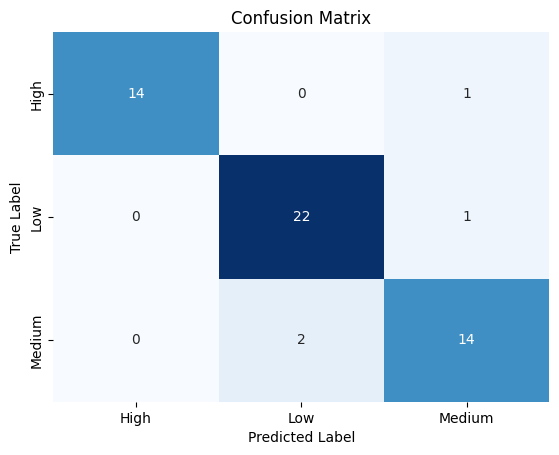

In [145]:
dtt = DecisionTreeClassifier()
y_pred_dttn_best = apply_model_and_get_stats(dtt,best_training_inputs,
                        best_training_classes,best_testing_inputs,best_testing_classes)


display_confusion_matrix(y_pred_dttn_best,best_testing_classes)

Accuracy: 0.8703703703703703
Precision: 0.8745512820512821
Recall: 0.8668478260869565
F1-score: 0.8671208750463478


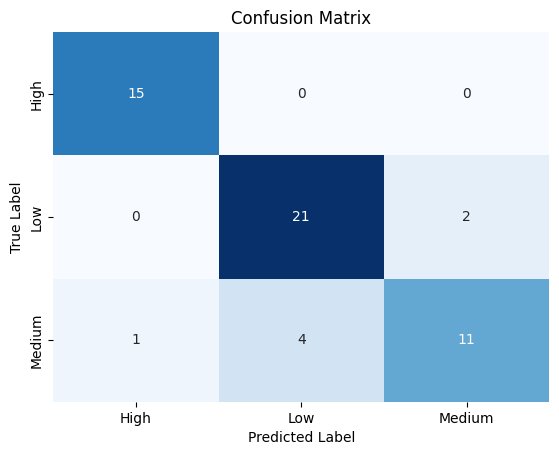

In [148]:
knn = KNeighborsClassifier()
y_pred_knn_best = apply_model_and_get_stats(knn,best_training_inputs,
                        best_training_classes,best_testing_inputs,best_testing_classes)


display_confusion_matrix(y_pred_knn_best,best_testing_classes)

In [66]:
from sklearn import svm

#Create a svm Classifier
svc = svm.SVC(kernel='linear') # Linear Kernel

y_pred_svm_best = apply_model_and_get_stats(svc,training_inputs,
                        training_labels,test_inputs,test_labels)


display_confusion_matrix(y_pred_svm_best,test_labels)

In [172]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

"""
# Convert the target variable into a one-hot encoded matrix
y_train = to_categorical(best_training_classes)
y_test = to_categorical(best_testing_classes)

# Create a neural network model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(best_training_inputs, y_train, epochs=50, batch_size=10, verbose=0)

y_pred_neural_network = model.predict(best_testing_inputs)

accuracy = accuracy_score(y_test, y_pred_neural_network)

# Calculate precision
precision = precision_score(y_test, y_pred_neural_network, average='macro')

# Calculate recall
recall = recall_score(y_test, y_pred_neural_network, average='macro')

# Calculate F1-score
f1 = f1_score(y_test, y_pred_neural_network, average='macro')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

display_confusion_matrix(y_pred_neural_network,best_testing_classes)
"""

2023-04-23 14:56:24.250775: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ValueError: invalid literal for int() with base 10: 'Medium'